In [ ]:
vgg16
vgg19
resnet
inception(google net)
mobile net
nasnet
effient net

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
import numpy as np

In [ ]:
model=VGG16(weights='imagenet')

553467096/553467096 [==============================] - 16s 0us/step


In [ ]:
img_path="/content/tajmahal.jpeg"

In [ ]:
img=image.load_img(img_path,target_size=(224,224))

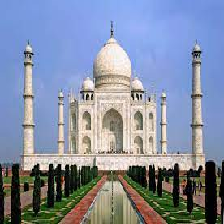

In [ ]:
img

In [ ]:
img=image.img_to_array(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img=np.expand_dims(img,axis=0)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 21ms/step


In [ ]:
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.6239656),
  ('n02109047', 'Great_Dane', 0.12550086),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.1146145),
  ('n02092339', 'Weimaraner', 0.068485014),
  ('n02104029', 'kuvasz', 0.018542616)]]

In [ ]:
model2=ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
img

array([[[[-67.68    , -57.779   , -97.939   ],
         [-65.68    , -55.779   , -95.939   ],
         [-65.68    , -55.779   , -95.939   ],
         ...,
         [ 13.32    ,  32.221   , -26.939003],
         [ 14.32    ,  31.221   , -26.939003],
         [ 14.32    ,  31.221   , -26.939003]],

        [[-70.68    , -59.779   , -97.939   ],
         [-69.68    , -58.779   , -96.939   ],
         [-67.68    , -58.779   , -95.939   ],
         ...,
         [ 13.32    ,  32.221   , -26.939003],
         [ 14.32    ,  31.221   , -26.939003],
         [ 14.32    ,  31.221   , -26.939003]],

        [[-74.68    , -60.779   , -98.939   ],
         [-73.68    , -59.779   , -97.939   ],
         [-73.68    , -59.779   , -97.939   ],
         ...,
         [ 15.32    ,  34.221   , -24.939003],
         [ 16.32    ,  33.221   , -24.939003],
         [ 14.32    ,  31.221   , -26.939003]],

        ...,

        [[-66.68    , -56.779   , -88.939   ],
         [-70.68    , -57.779   , -88.939   ]

In [ ]:
img=preprocess_input(img)

In [ ]:
prediction=model2.predict(img)

1/1 [==============================] - 0s 25ms/step


In [ ]:
decode_predictions(prediction)

[[('n03788195', 'mosque', 0.898503),
  ('n03877845', 'palace', 0.02831846),
  ('n03028079', 'church', 0.019849645),
  ('n03781244', 'monastery', 0.016059043),
  ('n02825657', 'bell_cote', 0.012840791)]]

# finetuning of the pre training model

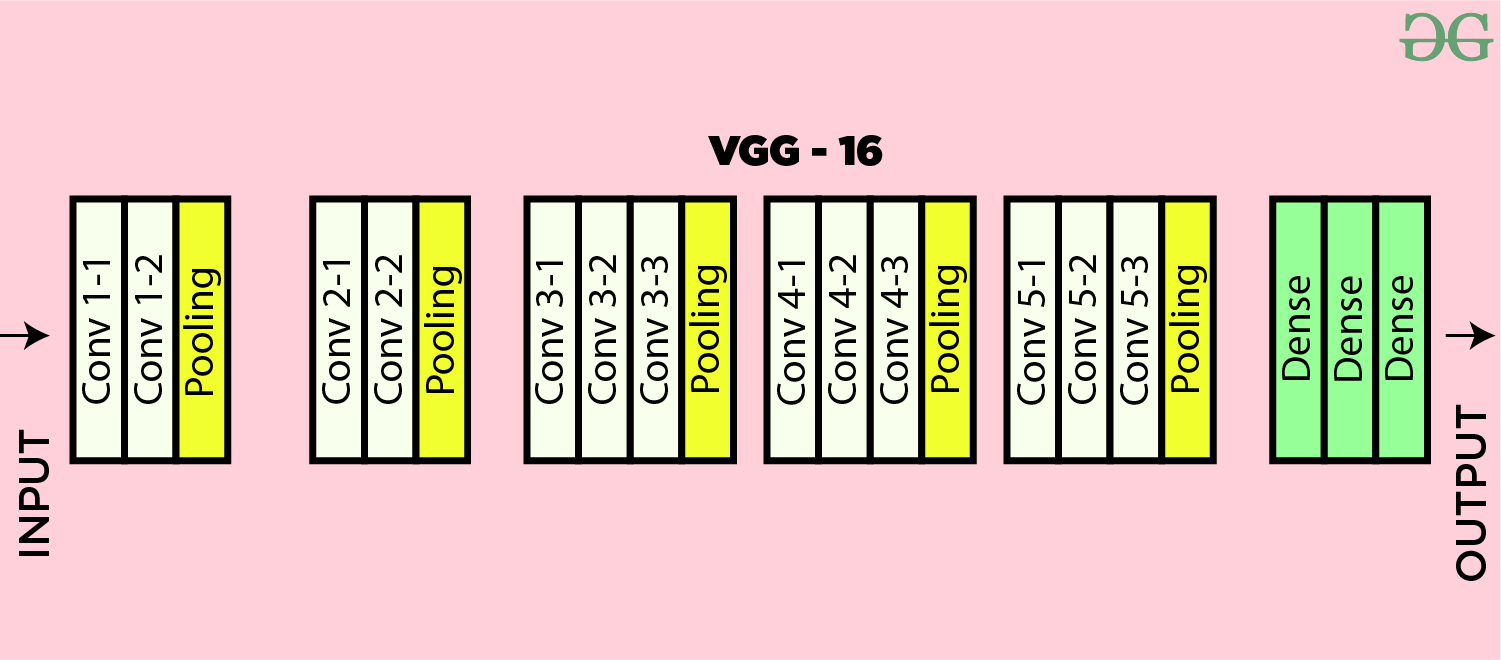

In [ ]:
conv_base=VGG16(weights="imagenet",
                include_top=False,
                input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 265)               2171145   
                                                                 
 dense_1 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 16886099 (64.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/cat-dog/training_set',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/cat-dog/test_set',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"


)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

 43/250 [====>.........................] - ETA: 12:01 - loss: 0.5184 - accuracy: 0.7892

KeyboardInterrupt: ignored

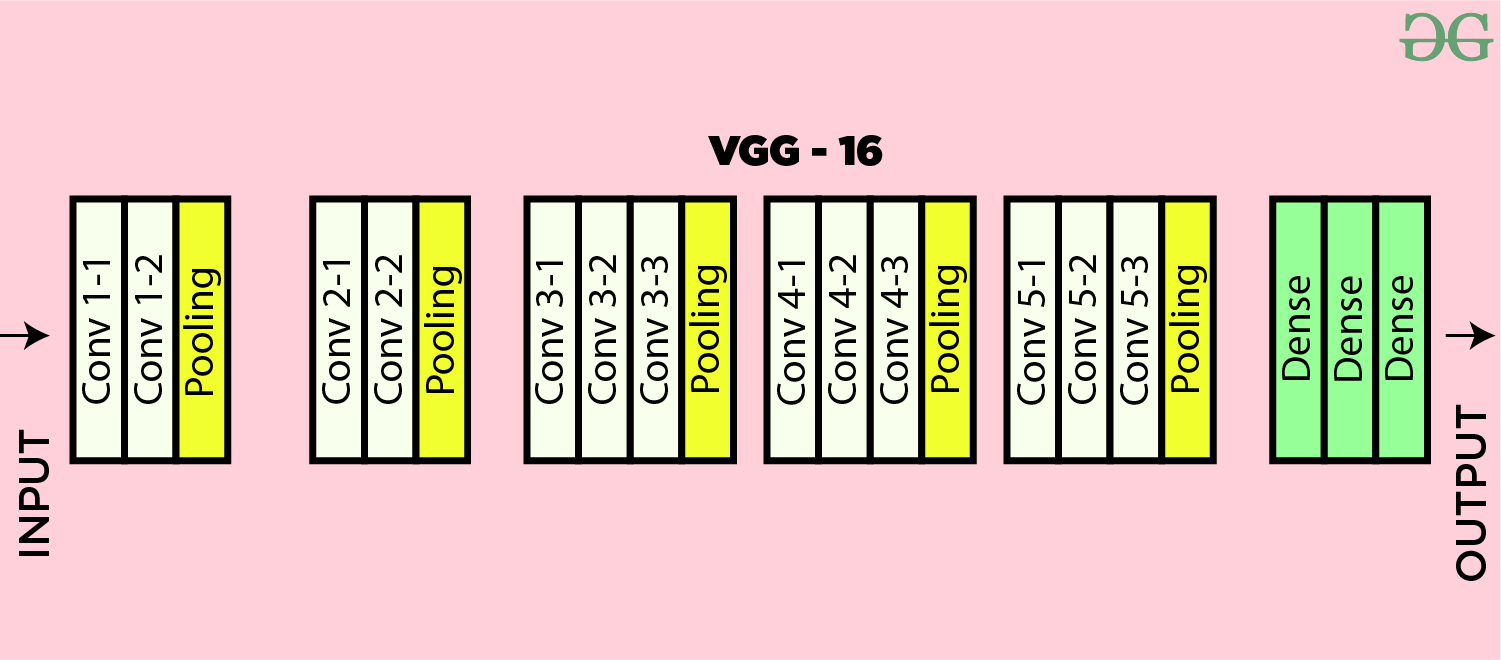

In [ ]:
conv_base.layers

In [ ]:
len(conv_base.layers)

19

In [ ]:
for layer in conv_base.layers:
  print(layer.name)

input_5
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 265)               2171145   
                                                                 
 dense_3 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 9250835 (35.29 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

250/250 [==============================] - 1109s 4s/step - loss: 0.7443 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
